# Implementación de Modelos Predictivos - Precios de Aguacate

## 1. Preparación de Datos para Modelado

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar dataset limpio
avocado = pd.read_csv('../data/avocado_clean.csv')

# Separar features y target
X = avocado.drop('AveragePrice', axis=1)
y = avocado['AveragePrice']

# Dividir en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar features (excepto variables dummy)
scaler = StandardScaler()
numeric_cols = ['Total Volume_log', '4046', '4225', 'Total Bags']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (12774, 25), Test shape: (5475, 25)


## 2. Modelo 1: Regresión Lineal

### Implementación

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)

# Métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal:")
print(f"- MSE: {mse_lr:.4f}")
print(f"- R²: {r2_lr:.4f}")

Regresión Lineal:
- MSE: 0.0852
- R²: 0.4717


## 3. Modelo 2:Random Forest Regressor



In [16]:
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"- MSE: {mse_rf:.4f}")
print(f"- R²: {r2_rf:.4f}")

# Importancia de features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Features:")
print(feature_importance.head(5))


Random Forest:
- MSE: 0.0282
- R²: 0.8249

Top 5 Features:
         Feature  Importance
12  type_organic    0.443023
7     Large Bags    0.090340
2           4046    0.085583
3           4225    0.068713
9           year    0.063536


### Modelo 3: XGBoost Regressor (Tercer Modelo Avanzado)


In [17]:
from xgboost import XGBRegressor

# Entrenamiento
xgb = XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test)

# Métricas
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print(f"- MSE: {mse_xgb:.4f}")
print(f"- R²: {r2_xgb:.4f}")


XGBoost:
- MSE: 0.0207
- R²: 0.8718


### comparacion de modelos

             Modelo       MSE        R²
2           XGBoost  0.020687  0.871777
1     Random Forest  0.028247  0.824919
0  Regresión Lineal  0.085238  0.471682


/tmp/ipykernel_40077/2557616722.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')


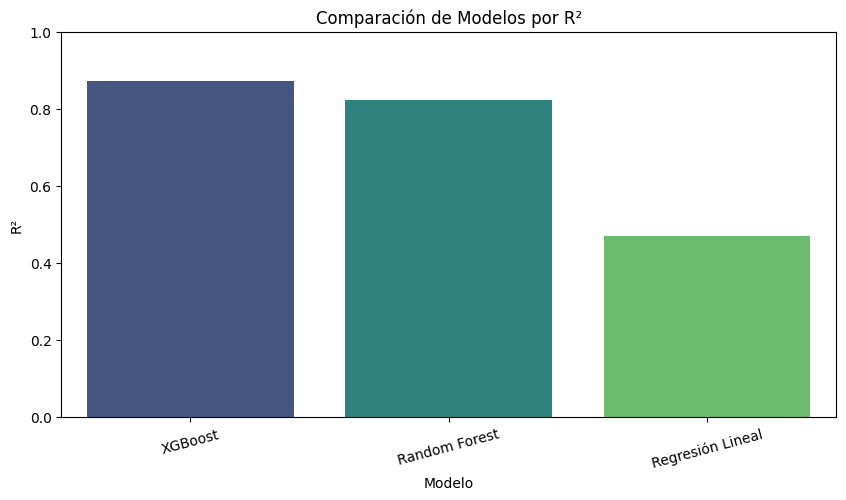

In [18]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'R²': [r2_lr, r2_rf, r2_xgb]
}).sort_values('R²', ascending=False)

print(results)

# Gráfico de comparación
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')
plt.title('Comparación de Modelos por R²')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

### visualizacion de las predicciones

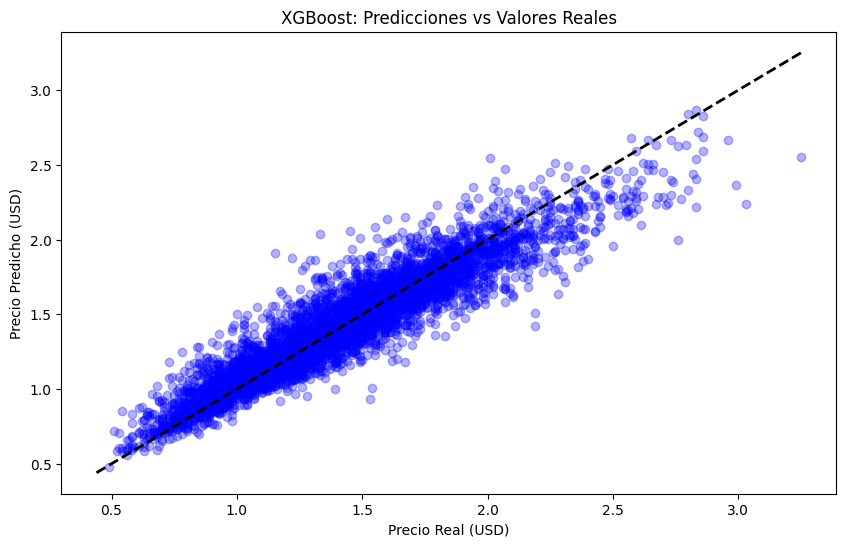

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.show()